### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

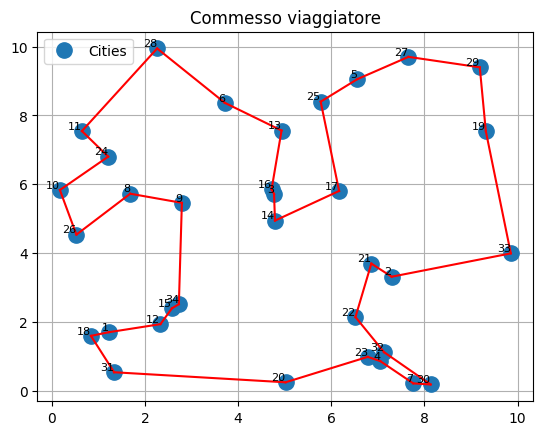

In [29]:
import matplotlib.pyplot as plt

# Leggi i dati dal file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_10\lez10_1\square.txt', "r") as file:
    lines = file.readlines()

# Estrai gli indici, le coordinate x e y dalle linee del file
indices = []
x = []
y = []
for line in lines:
    city_index, city_x, city_y = map(float, line.split())
    indices.append(int(city_index))
    x.append(city_x)
    y.append(city_y)

# Plot
plt.figure(1)
plt.plot(x, y, marker='o', linestyle='', markersize=11, label='Cities')

# Etichette con gli indici delle città
for i, city_index in enumerate(indices):
    plt.text(x[i], y[i], str(city_index), fontsize=8, ha='right', va='bottom')

# Linea che collega le città nell'ordine degli indici
for i in range(len(indices) - 1):
    plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='r', linestyle='-')

# Assicurati che l'ultimo punto si colleghi al primo
plt.plot([x[-1], x[0]], [y[-1], y[0]], color='r', linestyle='-')
plt.title('Commesso viaggiatore')
plt.grid(True)
plt.legend()

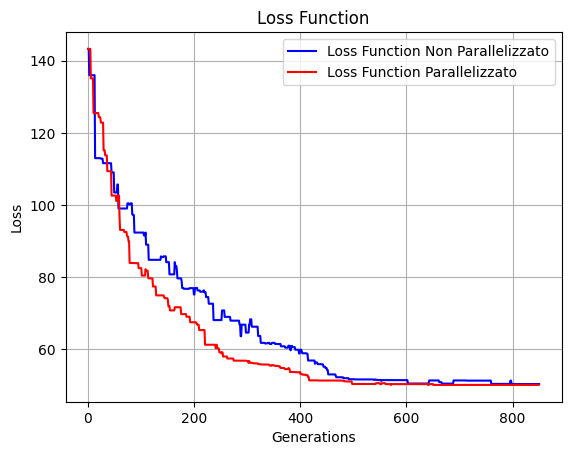

In [30]:
# Leggi i dati della loss dal primo file
loss1 = []
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_9\lez9_2\loss.txt', 'r') as file:
    next(file)  # Salta la prima riga
    for line in file:
        values = line.split()
        loss1.append(float(values[0]))

# Leggi i dati della loss dal secondo file
loss2 = []
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_10\lez10_1\loss.txt', 'r') as file:
    for line in file:
        values = line.split()
        loss2.append(float(values[0]))

# Numero di generazioni
generations1 = range(1, len(loss1) + 1)
generations2 = range(1, len(loss2) + 1)

# Plot della loss in funzione del numero di generazioni
plt.figure()  # Crea una nuova figura per il plot della loss
plt.plot(generations1, loss1, color='b', label='Loss Function Non Parallelizzato')
plt.plot(generations2, loss2, color='r', label='Loss Function Parallelizzato')
plt.xlabel('Generations')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.grid(True)
plt.legend()

plt.show()


### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

$NON$ $PARALLELIZZATO$

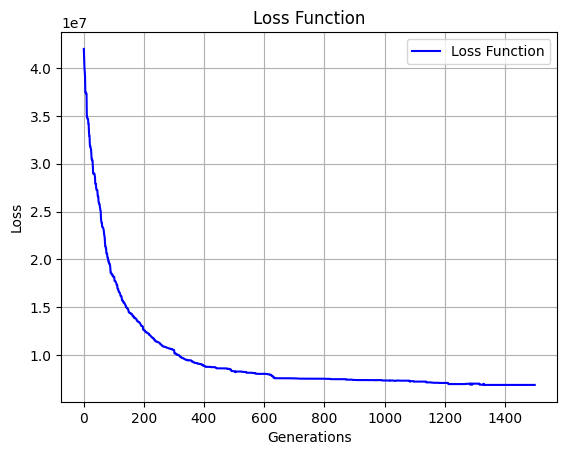

In [18]:
# Leggi i dati della loss dalla file
loss = []
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_10\lez10_2\loss_nopar.txt', 'r') as file:
    for line in file:
        values = line.split()
        loss.append(float(values[0]))

# Numero di generazioni
generations = range(1, len(loss) + 1)

# Plot della loss in funzione del numero di generazioni
plt.figure()  # Crea una nuova figura per il plot della loss
plt.plot(generations, loss, color='b', label='Loss Function')
plt.xlabel('Generations')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.grid(True)
plt.legend()


plt.show()


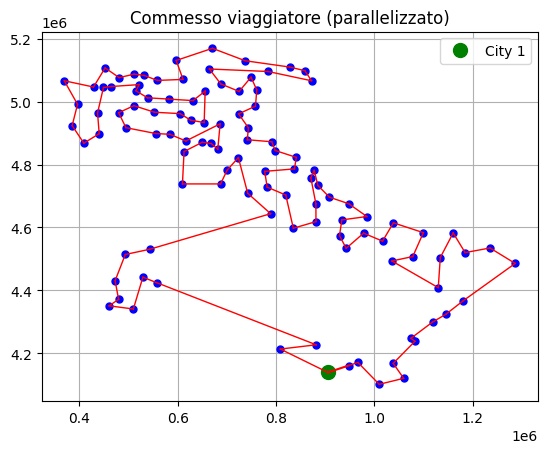

In [4]:
import matplotlib.pyplot as plt

# Leggi i dati dal file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_10\lez10_2\italy_nopar.txt', "r") as file:
    lines = file.readlines()

# Estrai gli indici, le coordinate x e y dalle linee del file
indices = []
x = []
y = []
for line in lines:
    city_index, city_x, city_y = map(float, line.split())
    indices.append(int(city_index))
    x.append(city_x)
    y.append(city_y)

# Plot
for i, city_index in enumerate(indices):
    if city_index == 1:
        plt.plot(x[i], y[i], marker='o', linestyle='', markersize=10, color='g', label='City 1')
    else:
        plt.plot(x[i], y[i], marker='o', linestyle='', markersize=5, color='b')

# Linea che collega le città nell'ordine degli indici
for i in range(len(indices) - 1):
    plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='r', linestyle='-', linewidth=1)

# Assicurati che l'ultimo punto si colleghi al primo
plt.plot([x[-1], x[0]], [y[-1], y[0]], color='r', linestyle='-')

plt.title('Commesso viaggiatore (parallelizzato)')
plt.grid(True)
plt.legend()
plt.show()


$PARALLELIZZAT0$

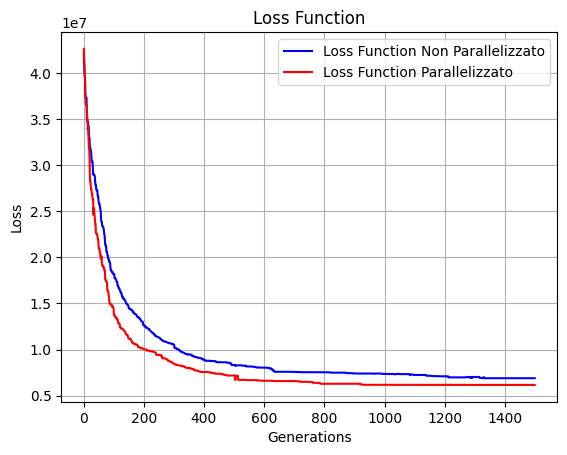

In [23]:
# Leggi i dati della loss dal primo file
loss1 = []
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_10\lez10_2\loss_nopar.txt', 'r') as file:
    for line in file:
        values = line.split()
        loss1.append(float(values[0]))

# Leggi i dati della loss dal secondo file
loss2 = []
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_10\lez10_2\loss.txt', 'r') as file:
    for line in file:
        values = line.split()
        loss2.append(float(values[0]))

# Numero di generazioni
generations1 = range(1, len(loss1) + 1)
generations2 = range(1, len(loss2) + 1)

# Plot della loss in funzione del numero di generazioni
plt.figure()  # Crea una nuova figura per il plot della loss
plt.plot(generations1, loss1, color='b', label='Loss Function Non Parallelizzato')
plt.plot(generations2, loss2, color='r', label='Loss Function Parallelizzato')
plt.xlabel('Generations')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.grid(True)
plt.legend()

plt.show()


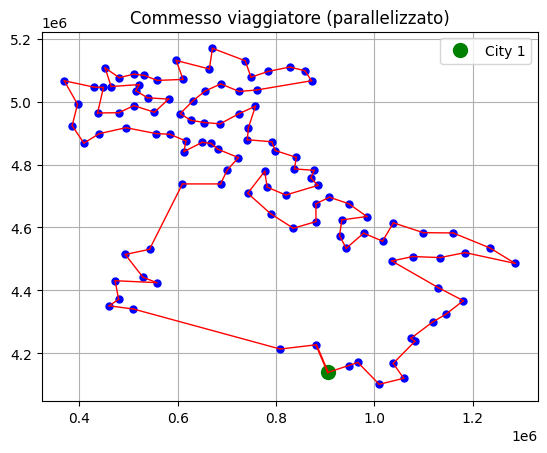

In [3]:
import matplotlib.pyplot as plt

# Leggi i dati dal file
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_10\lez10_2\italy.txt', "r") as file:
    lines = file.readlines()

# Estrai gli indici, le coordinate x e y dalle linee del file
indices = []
x = []
y = []
for line in lines:
    city_index, city_x, city_y = map(float, line.split())
    indices.append(int(city_index))
    x.append(city_x)
    y.append(city_y)

# Plot
for i, city_index in enumerate(indices):
    if city_index == 1:
        plt.plot(x[i], y[i], marker='o', linestyle='', markersize=10, color='g', label='City 1')
    else:
        plt.plot(x[i], y[i], marker='o', linestyle='', markersize=5, color='b')

# Linea che collega le città nell'ordine degli indici
for i in range(len(indices) - 1):
    plt.plot([x[i], x[i+1]], [y[i], y[i+1]], color='r', linestyle='-', linewidth=1)

# Assicurati che l'ultimo punto si colleghi al primo
plt.plot([x[-1], x[0]], [y[-1], y[0]], color='r', linestyle='-')

plt.title('Commesso viaggiatore (parallelizzato)')
plt.grid(True)
plt.legend()
plt.show()


La loss passa da $6,89*10^6$ nel caso non-parallelizzato a $6,17*10^6$ dopo la parallelizzazione (ogni migrazione invio i migliori 100 paths di ogni nodo al nodo 0 tramite la funzione MPI_gather)